# Milestone 2: Prepping the training data

In [48]:
%matplotlib inline

import os
import sys
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from imdb import IMDb
from unidecode import unidecode
from nltk.corpus import stopwords
from collections import OrderedDict
from matplotlib import pyplot as plt
from IPython.display import Image, display

src_dir = os.path.join(os.getcwd(), os.pardir, os.pardir, 'src')
sys.path.append(src_dir)

# Importing the tmdb code from src/data
from data import tmdb

plt.style.use('ggplot')

In [2]:
%load_ext autoreload
%autoreload 2

In [76]:
df = pd.read_json('../../data/themoviedb-5k-sample-with_genres-details-english.json')
print(df.shape)
df.head()

(5000, 28)


,adult,backdrop_path,belongs_to_collection,budget,cast,crew,genre_ids,genres,homepage,id,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,/gQ7ejOw1E4bmUNagfjEYwpHpAiy.jpg,None,0,"[{u'name': u'Matthew Lillard', u'character': u...","[{u'name': u'Eve Battaglia', u'department': u'...","[10751, 35, 18]","[{u'id': 10751, u'name': u'Family'}, {u'id': 3...",,261036,...,2014-04-18,37285,90.0,"[{u'iso_639_1': u'en', u'name': u'English'}]",Released,,Match,False,5.1,12
1,False,None,None,0,"[{u'name': u'OASIS', u'character': u'Themselve...",[],[10402],"[{u'id': 10402, u'name': u'Music'}]",,109847,...,2009-05-03,0,111.0,"[{u'iso_639_1': u'en', u'name': u'English'}]",Released,,Oasis Monumental 2009,False,0.0,0
2,False,None,None,0,"[{u'name': u'Max Gass', u'character': u'', u'o...","[{u'name': u'Matt Lambert', u'department': u'D...",[18],"[{u'id': 18, u'name': u'Drama'}]",,329420,...,2013-12-10,0,13.0,"[{u'iso_639_1': u'en', u'name': u'English'}, {...",Released,,Heile Gänsje,False,0.0,0
3,False,None,None,0,"[{u'name': u'Edmond Mercier', u'character': u'...","[{u'name': u'J.T. Petty', u'department': u'Dir...","[27, 18, 53]","[{u'id': 27, u'name': u'Horror'}, {u'id': 18, ...",,41560,...,2001-07-01,0,74.0,"[{u'iso_639_1': u'en', u'name': u'English'}]",Released,,Soft for Digging,False,7.5,2
4,False,/8z4ZEMWimpCFpnsM24owu8u6V6w.jpg,None,400000,[],"[{u'name': u'Marah Strauch', u'department': u'...",[99],"[{u'id': 99, u'name': u'Documentary'}]",http://www.sunshinesupermanfilm.com,292081,...,2015-05-22,88097,100.0,"[{u'iso_639_1': u'en', u'name': u'English'}]",Released,If there are mountains let's climb them. If th...,Sunshine Superman,False,7.1,9


In [79]:
df['overview'].head()

0    A Seattle couple travel to New York to intervi...
1    Performance of the band at River Plate Stadium...
2    A portrait of Berlin youth, sexuality, and ide...
3    A man wanders into the woods in search of his ...
4    Documentary portrait of Carl Boenish, the fath...
Name: overview, dtype: object

## $y$: Just picking the top `n` genres
In order of frequency, these are the top seven film genres.
- Drama
- Comedy
- Thriller
- Action
- Romance
- Adventure
- Crime

Furthermore, Action/Thriller, Action/Adventure, Drama/Romance, Drama/Thriller, and a few others could be combined. For now, and for simplicity, we will focus on predicting single genres per movie.

In [81]:
pop_genres = OrderedDict()
pop_genres[1] = 'Drama'
pop_genres[2] = 'Comedy'
pop_genres[3] = 'Thriller'
pop_genres[4] = 'Action'
pop_genres[5] = 'Romance'
pop_genres[6] = 'Adventure'
pop_genres[7] = 'Crime'
pop_genres

OrderedDict([(1, 'Drama'),
             (2, 'Comedy'),
             (3, 'Thriller'),
             (4, 'Action'),
             (5, 'Romance'),
             (6, 'Adventure'),
             (7, 'Crime')])

In [82]:
df['genres'].head()

0    [{u'id': 10751, u'name': u'Family'}, {u'id': 3...
1                  [{u'id': 10402, u'name': u'Music'}]
2                     [{u'id': 18, u'name': u'Drama'}]
3    [{u'id': 27, u'name': u'Horror'}, {u'id': 18, ...
4               [{u'id': 99, u'name': u'Documentary'}]
Name: genres, dtype: object

In [83]:
def most_popular_genre(row):
    genres = [x['name'] for x in row['genres']]
    for genre in genres:
        for key, value in pop_genres.items():
            if genre in value:
                return value

df['top_genre'] = df.apply(lambda x: most_popular_genre(x), axis = 1)
df['top_genre'].fillna(value = 'Other', inplace = True)
df[['genres', 'top_genre']].head()

,genres,top_genre
0,"[{u'id': 10751, u'name': u'Family'}, {u'id': 3...",Comedy
1,"[{u'id': 10402, u'name': u'Music'}]",Other
2,"[{u'id': 18, u'name': u'Drama'}]",Drama
3,"[{u'id': 27, u'name': u'Horror'}, {u'id': 18, ...",Drama
4,"[{u'id': 99, u'name': u'Documentary'}]",Other


In [85]:
df['top_genre'].value_counts()

Other        1501
Drama        1170
Comedy        926
Action        520
Thriller      396
Adventure     180
Crime         161
Romance       146
Name: top_genre, dtype: int64

My sense is that we should drop genres that are less frequent than Other - specifically, Thriller and Romance. Also, in general, Action and Adventure seem like they could be combined. And certain genre-types (namely, Horror and Sci-fi) are completely missing (folded into Other, it seems).

<hr>

## $X$: Combining TMDb data with Kaggle data
I think grabbing the TMDb summaries for all the movies will be very valuable. We can then use a naive Bayes classifier on these summaries to determine whether a movie is of a certain genre or not. (Here's the scikit-learn documentation for the method we could use: [`sklearn.naive_bayes.MultinomialNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html))

In [89]:
stops = set(nltk.corpus.stopwords.words('english'))
all_words_ever = []

def add_cols_for_all_words(row):
    if row['overview'] is not None:
        words = nltk.word_tokenize(row['overview'])
        words = [word.lower() for word in words if len(word) > 1 and word not in stops]
        all_words_ever.extend(words)
    return row

def parse_words(row):
    words = nltk.word_tokenize(row['overview'])
    words = [word.lower() for word in words if len(word) > 1 and word not in stops]
    for word in words:
        row[unidecode(word)] += 1
    return row

In [90]:
df = df.apply(lambda x: add_cols_for_all_words(x), axis = 1)

for word in all_words_ever:
    df[unidecode(word)] = 0

df = df.apply(lambda x: parse_words(x), axis = 1)
    
print(df.shape)
df.head()

TypeError: ('expected string or buffer', u'occurred at index 0')

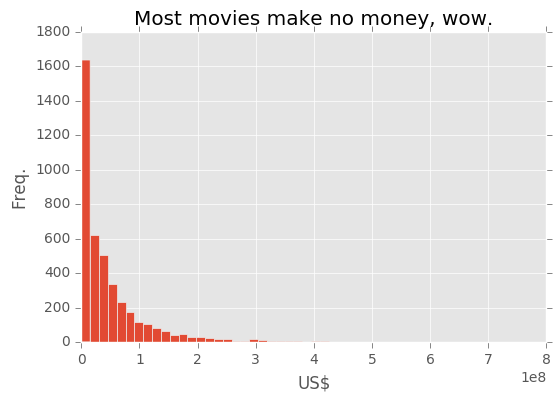

In [58]:
df['gross'].hist(bins = 50)
plt.title('Most movies make no money, wow.')
plt.xlabel('US$')
plt.ylabel('Freq.')
plt.show()

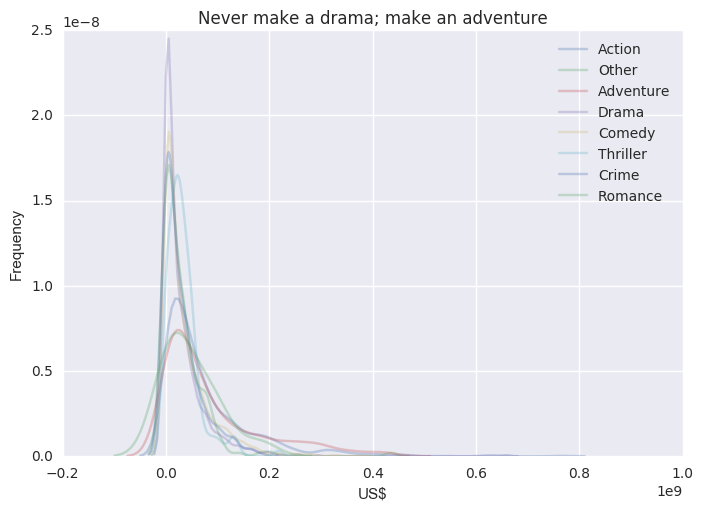

In [68]:
for genre in df['top_genre'].unique():
    this_df = df[df['top_genre'] == genre]
    sns.kdeplot(this_df['gross'], alpha = 0.3, label = genre, )

plt.title("Never make a drama; make an adventure")
plt.xlabel('US$')
plt.ylabel('Frequency')
plt.legend()
plt.show()

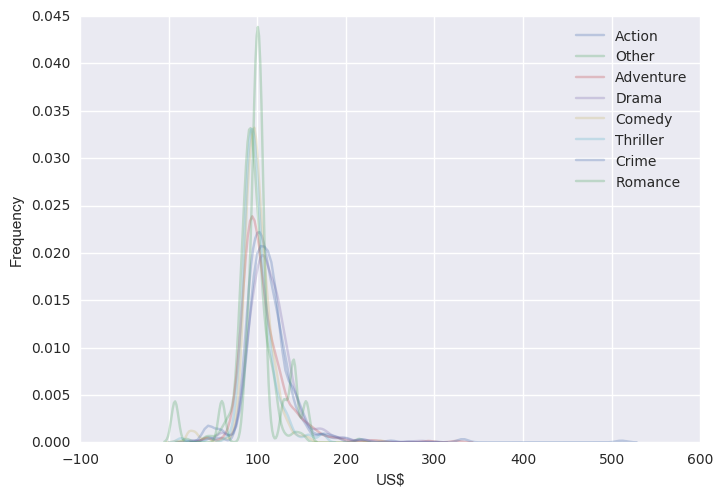

In [71]:
for genre in df['top_genre'].unique():
    this_df = df[df['top_genre'] == genre]
    sns.kdeplot(this_df['duration'], alpha = 0.3, label = genre, )

plt.title("Never make a drama; make an adventure")
plt.xlabel('US$')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [74]:
for genre in df['top_genre'].unique():
    plt.plot(df['actor_1_facebook_likes'], df['gross'], 'o', alpha = 0.3)

plt.show()

ValueError: to_rgba: Invalid rgba arg "Action"
to_rgb: Invalid rgb arg "Action"
could not convert string to float: action